In [ ]:
!pip install ultralytics
!pip install dill
!pip install supervision
!pip install onnx


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.7/802.7 kB 17.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
import torch
print(torch.cuda.is_available())


True


In [ ]:
!pip install ultralytics onnx matplotlib pillow requests numpy


In [ ]:
import zipfile

# Suponiendo que has subido el archivo datasetecuador.zip a Google Colab
zip_file_path = '/content/datasetecuador.zip'
extract_path = '/content/datasetecuador/'

# Descomprimir el archivo
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [ ]:
import os

# Directorios de imágenes y etiquetas
train_label_dir = '/content/datasetecuador/datasetecuador/labels/train/'
val_label_dir = '/content/datasetecuador/datasetecuador/labels/val/'
train_image_dir = '/content/datasetecuador/datasetecuador/images/train/'
val_image_dir = '/content/datasetecuador/datasetecuador/images/val/'

# Mapear clases inválidas a clases válidas
class_mapping = {
    15: 0,
    16: 1,
    17: 2,
    18: 3,
    19: 4
}

# Función para revisar y corregir etiquetas
def check_and_correct_labels(label_dir):
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        if label_file.endswith('.txt'):
            with open(label_path, 'r') as f:
                lines = f.readlines()

            corrected_lines = []
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0])
                if class_id in class_mapping:
                    new_class_id = class_mapping[class_id]
                    corrected_line = ' '.join([str(new_class_id)] + parts[1:]) + '\n'
                    corrected_lines.append(corrected_line)
                    print(f"Info: Changed class {class_id} to {new_class_id} in file {label_file}.")
                else:
                    corrected_lines.append(line)

            # Reescribir el archivo con las etiquetas corregidas
            with open(label_path, 'w') as f:
                f.writelines(corrected_lines)

# Ejecutar la función para corregir etiquetas en ambos conjuntos de entrenamiento y validación
check_and_correct_labels(train_label_dir)
check_and_correct_labels(val_label_dir)


Info: Changed class 16 to 1 in file iguanamarina33.txt.
Info: Changed class 18 to 3 in file pinzondarwin26.txt.
Info: Changed class 16 to 1 in file iguanamarina15.txt.
Info: Changed class 17 to 2 in file lobomarino17.txt.
Info: Changed class 17 to 2 in file lobomarino17.txt.
Info: Changed class 16 to 1 in file iguanamarina11.txt.
Info: Changed class 17 to 2 in file lobomarino7.txt.
Info: Changed class 16 to 1 in file iguanamarina26.txt.
Info: Changed class 16 to 1 in file iguanamarina26.txt.
Info: Changed class 15 to 0 in file condorandino24.txt.
Info: Changed class 15 to 0 in file condorandino40.txt.
Info: Changed class 18 to 3 in file pinzondarwin8.txt.
Info: Changed class 19 to 4 in file tortugagigante37.txt.
Info: Changed class 15 to 0 in file condorandino37.txt.
Info: Changed class 16 to 1 in file iguanamarina31.txt.
Info: Changed class 15 to 0 in file condorandino1.txt.
Info: Changed class 16 to 1 in file iguanamarina36.txt.
Info: Changed class 19 to 4 in file tortugagigante7.txt

In [ ]:
data_config = """
train: /content/datasetecuador/datasetecuador/images/train
val: /content/datasetecuador/datasetecuador/images/val

nc: 5
names: ['condorandino', 'iguanamarina', 'lobomarino', 'pinzondarwin', 'tortugagigante']
"""

with open('/content/ecuador.yaml', 'w') as f:
    f.write(data_config)


In [ ]:
import os

# Directorios de etiquetas
train_label_dir = '/content/datasetecuador/datasetecuador/labels/train/'
val_label_dir = '/content/datasetecuador/datasetecuador/labels/val/'

# Función para revisar y corregir etiquetas
def check_and_correct_labels(label_dir):
    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)
        if label_file.endswith('.txt'):
            with open(label_path, 'r') as f:
                lines = f.readlines()

            corrected_lines = []
            for line in lines:
                parts = line.strip().split()
                class_id = int(parts[0])
                if class_id in range(5):  # Asegurarse de que las clases estén en el rango 0-4
                    corrected_lines.append(line)
                else:
                    print(f"Warning: Invalid class {class_id} in file {label_file}. Removing this line.")

            # Reescribir el archivo con las etiquetas corregidas
            with open(label_path, 'w') as f:
                f.writelines(corrected_lines)

# Ejecutar la función para revisar etiquetas en ambos conjuntos de entrenamiento y validación
check_and_correct_labels(train_label_dir)
check_and_correct_labels(val_label_dir)


In [ ]:
from ultralytics import YOLO

import matplotlib.pyplot as pp
import supervision as sv
from io import BytesIO # Librería para manipular bytes de datos en memoria
from PIL import Image # Estructura que representa la imagen en el paquete PIL
import requests
import numpy as np
import onnx
model = YOLO('yolov10n.pt')
model.train(data='/content/ecuador.yaml', epochs=50)



100%|██████████| 5.59M/5.59M [00:00<00:00, 119MB/s]


Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/ecuador.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

100%|██████████| 755k/755k [00:00<00:00, 19.9MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 121MB/s]


AMP: checks passed ✅


train: Scanning /content/datasetecuador/datasetecuador/labels/train... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 1183.45it/s]

train: New cache created: /content/datasetecuador/datasetecuador/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasetecuador/datasetecuador/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 953.42it/s]

val: New cache created: /content/datasetecuador/datasetecuador/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.27G      1.533      8.944      2.591         27        640: 100%|██████████| 13/13 [00:13<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:02<00:02,  2.17s/it]UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]

                   all         50         65     0.0217      0.863      0.165      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.09G      1.524      8.326       2.56         26        640: 100%|██████████| 13/13 [00:04<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         50         65    0.00746      0.947      0.265      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.09G      1.573        7.5       2.53         27        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         50         65    0.00944      0.925      0.239       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.09G       1.73      6.792      2.673         26        640: 100%|██████████| 13/13 [00:04<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


                   all         50         65    0.00605      0.932      0.391      0.263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       3.1G      1.822      6.514      2.741         30        640: 100%|██████████| 13/13 [00:07<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         50         65    0.00541      0.952      0.256      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.08G       1.81      6.047      2.699         26        640: 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.84it/s]

                   all         50         65      0.799     0.0867      0.331      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.08G      1.906      5.972      2.755         27        640: 100%|██████████| 13/13 [00:05<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         50         65      0.848     0.0667      0.292      0.195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.09G      1.897       5.72      2.705         29        640: 100%|██████████| 13/13 [00:04<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.45it/s]

                   all         50         65      0.682      0.114       0.36      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.09G       1.95      5.684      2.772         25        640: 100%|██████████| 13/13 [00:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         50         65      0.407      0.248      0.432      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.08G      1.842      5.111       2.61         37        640: 100%|██████████| 13/13 [00:05<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         50         65      0.248      0.232      0.282      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       3.1G      1.932      5.179      2.751         24        640: 100%|██████████| 13/13 [00:04<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         50         65      0.532      0.318      0.337      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.11G      1.859      4.883      2.642         26        640: 100%|██████████| 13/13 [00:07<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.47it/s]

                   all         50         65      0.453      0.176      0.246      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.12G      1.779      4.869      2.615         18        640: 100%|██████████| 13/13 [00:04<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         50         65      0.566      0.349      0.368      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.08G      1.839      4.665      2.615         29        640: 100%|██████████| 13/13 [00:08<00:00,  1.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         50         65      0.462      0.359      0.368      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.09G      1.796      4.565      2.592         22        640: 100%|██████████| 13/13 [00:05<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         50         65      0.497      0.511      0.516      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.08G      1.785      4.292      2.575         25        640: 100%|██████████| 13/13 [00:05<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         50         65       0.62      0.436      0.561      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.09G      1.725      4.168      2.554         32        640: 100%|██████████| 13/13 [00:04<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         50         65      0.696      0.456      0.522      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.08G      1.683      4.014      2.557         26        640: 100%|██████████| 13/13 [00:06<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         50         65      0.529      0.528      0.577      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.09G      1.711      3.881      2.553         30        640: 100%|██████████| 13/13 [00:04<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]

                   all         50         65      0.529       0.59      0.628      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.08G      1.677      3.884      2.506         33        640: 100%|██████████| 13/13 [00:04<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.78it/s]

                   all         50         65      0.588      0.516      0.592      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.11G      1.624      3.744      2.506         20        640: 100%|██████████| 13/13 [00:07<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.99it/s]

                   all         50         65      0.644      0.521      0.607      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.08G       1.73      3.667      2.552         28        640: 100%|██████████| 13/13 [00:04<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         50         65      0.665      0.673      0.692      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.08G      1.664      3.584       2.45         22        640: 100%|██████████| 13/13 [00:06<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         50         65      0.684      0.624      0.706      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.12G       1.56      3.423      2.423         28        640: 100%|██████████| 13/13 [00:04<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.07it/s]

                   all         50         65      0.563      0.548      0.624      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.09G      1.588      3.294      2.414         25        640: 100%|██████████| 13/13 [00:06<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         50         65      0.802       0.61      0.733      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.08G      1.547      3.239       2.43         24        640: 100%|██████████| 13/13 [00:04<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         50         65      0.714      0.688      0.725      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.08G      1.657      3.232      2.495         34        640: 100%|██████████| 13/13 [00:04<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         50         65      0.707      0.742      0.761      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.08G      1.494      3.133      2.392         27        640: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         50         65      0.677      0.611      0.734      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.09G      1.565      2.991      2.407         23        640: 100%|██████████| 13/13 [00:04<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.38it/s]

                   all         50         65      0.776      0.687      0.782      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50       3.1G      1.521      3.026      2.381         38        640: 100%|██████████| 13/13 [00:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         50         65      0.758      0.703      0.758      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       3.1G      1.469      2.816      2.362         33        640: 100%|██████████| 13/13 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.23it/s]

                   all         50         65      0.716      0.744      0.763      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.08G      1.458      2.893      2.341         25        640: 100%|██████████| 13/13 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         65      0.769      0.786      0.823      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.09G      1.438      2.644      2.331         35        640: 100%|██████████| 13/13 [00:04<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.75it/s]

                   all         50         65      0.815      0.685      0.807      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.12G      1.364      2.666      2.324         27        640: 100%|██████████| 13/13 [00:05<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         50         65       0.89      0.728      0.815      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.09G      1.377      2.755       2.32         21        640: 100%|██████████| 13/13 [00:04<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         50         65       0.78      0.834      0.829      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.08G      1.344       2.54       2.28         21        640: 100%|██████████| 13/13 [00:04<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         50         65      0.831      0.769      0.815      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.08G      1.261      2.461      2.259         22        640: 100%|██████████| 13/13 [00:04<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         50         65      0.784      0.788      0.797        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50       3.1G      1.348      2.512      2.287         15        640: 100%|██████████| 13/13 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         50         65      0.805      0.739      0.789      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.09G      1.221      2.378      2.215         26        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.67it/s]

                   all         50         65      0.746      0.738      0.777      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.09G      1.247      2.218      2.203         28        640: 100%|██████████| 13/13 [00:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         50         65       0.85      0.658      0.802      0.629


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.07G     0.9984      3.734      2.103          8        640: 100%|██████████| 13/13 [00:11<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.56it/s]

                   all         50         65      0.889      0.611      0.766      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.08G     0.9158      3.465       1.97          9        640: 100%|██████████| 13/13 [00:04<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         50         65      0.816      0.669      0.752      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.08G      0.875       3.27      1.943          8        640: 100%|██████████| 13/13 [00:05<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         50         65      0.846      0.624      0.743      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.08G     0.8509      3.178      1.985          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         50         65       0.83      0.674      0.793      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.07G     0.8454      3.088      1.964         19        640: 100%|██████████| 13/13 [00:07<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         50         65      0.796      0.693      0.783      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.08G     0.8897      3.084      1.998          9        640: 100%|██████████| 13/13 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         50         65      0.857       0.68      0.771      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.08G     0.8132      3.059      1.918         10        640: 100%|██████████| 13/13 [00:05<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.37it/s]

                   all         50         65       0.74      0.769      0.785      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.08G     0.7639      3.042      1.921          8        640: 100%|██████████| 13/13 [00:04<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.88it/s]

                   all         50         65      0.883      0.642      0.801      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.07G     0.8326      2.955       1.97         10        640: 100%|██████████| 13/13 [00:04<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         50         65      0.875      0.703      0.823      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.08G     0.7754      2.889      1.892         11        640: 100%|██████████| 13/13 [00:05<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         50         65      0.885      0.696      0.824      0.602



50 epochs completed in 0.129 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.8MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2,696,366 parameters, 0 gradients, 8.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]


                   all         50         65      0.851      0.658      0.804       0.63
          condorandino         10         12      0.794      0.583      0.813      0.614
          iguanamarina         10         10      0.988        0.7      0.857      0.693
            lobomarino         10         19      0.904      0.495      0.557      0.397
          pinzondarwin         10         10      0.759        0.9      0.954      0.772
        tortugagigante         10         14       0.81       0.61      0.837      0.674
Speed: 0.2ms preprocess, 3.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78e4e3d46440>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

Using device: cuda

0: 384x640 4 birds, 9.4ms
Speed: 1.8ms preprocess, 9.4ms inference, 0.4ms postprocess per image at shape (1, 3, 384, 640)
Tiempo de inferencia con GPU: 0.1500 segundos


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


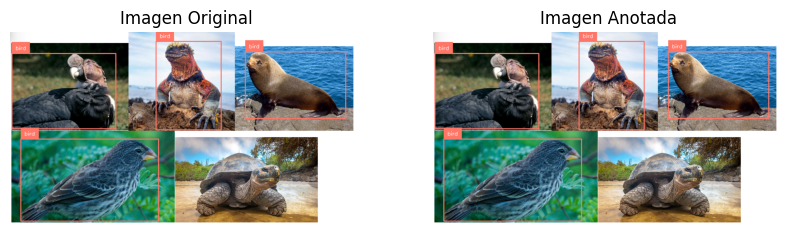

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image
import torch
import time
import numpy as np
from io import BytesIO
import supervision as sv

# Verificar si CUDA está disponible y usarla
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Descargar y cargar el modelo
model = YOLO('/content/yolov10n.pt').to(device)

# Cargar la imagen capturada
image_path = '/content/captura_imagen.png'
img = Image.open(image_path).convert('RGB')  # Cargar la imagen
image = np.array(img)  # Convertir la imagen en una representación de NumPy

# Medir el tiempo de inferencia con GPU
start_time = time.time()
# The model prediction should be called with an image and return a single Results object
results = model(img)[0]  # Access the first element of the list, which should be the Results object
end_time = time.time()
gpu_inference_time = end_time - start_time
print(f"Tiempo de inferencia con GPU: {gpu_inference_time:.4f} segundos")

# Obtener las detecciones
detections = sv.Detections.from_ultralytics(results)

# Anotadores de bounding boxes y etiquetas
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Anotar la imagen
annotated_image = bounding_box_annotator.annotate(scene=image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

# Mostrar la imagen original y la imagen anotada lado a lado
figure, axes = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(10, 7)

axes[0].imshow(image)
axes[0].axis('off')
axes[0].set_title('Imagen Original')

axes[1].imshow(annotated_image)
axes[1].axis('off')
axes[1].set_title('Imagen Anotada')

plt.show()

In [ ]:
import shutil
from google.colab import files

# Comprimir la carpeta 'runs' en un archivo zip
shutil.make_archive('runs', 'zip', 'runs')

# Descargar el archivo zip
files.download('runs.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>